We're covering convolutions in my Mathematical Methods of Physics class now, and I've never loved any of the textbook explanations I've seen. I especially dislike the ones that obscure the underlying physical interpretation, and [A Student's Guide to Fourier Transforms](http://www.cambridge.org/us/academic/subjects/physics/mathematical-methods/students-guide-fourier-transforms-applications-physics-and-engineering-3rd-edition?format=PB&isbn=9780521176835#pjGd6C740q0xyglZ.97) by James is definitely the best I've seen. Here's my version of his version.

# The setup: a spectrometer

In class, I have students describe what a spectrometer is, but this is really true of any physical instrument. We get to the point where we say that you feed a spectrometer some signal, $S$, and it's going to give you some output function $\mathcal{O}$. So, if you had a perfect spectrometer, and you fed it a single frequency $\lambda_0$, the output would again be that perfect $\lambda_0$.

Let's plot that. **Note: to make this easier to read as a blog post, I've moved a lot of the code to the bottom of the notebook. Run that stuff first if you want to run this interactively.**

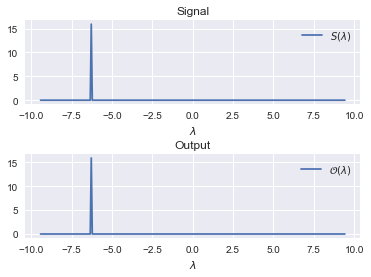

In [72]:
plotso(signal=Shapes['delta'], output=Shapes['delta'])

Great. We then had a discussion of what your output would look like for any real instrument. You get an Instrument function, $I$. This is also called a point-spread function, or a Green's function, or an impulse. Most students were pretty comfortable with the idea that, when you take a picture of a star, you get a starburst pattern, which is the instrument function of a camera. So, in that case, we'd get

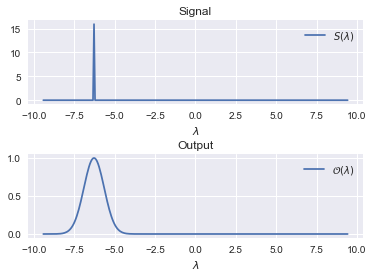

In [73]:
plotso(signal=Shapes['delta'], output=Shapes['gaussian'])

No longer infinitely high (because it's not a $\delta$), etc. Then, intuitively, if we had two frequencies in our input signal, we'd get two in our output. That looks a little more interesting. If they're far away, we get:

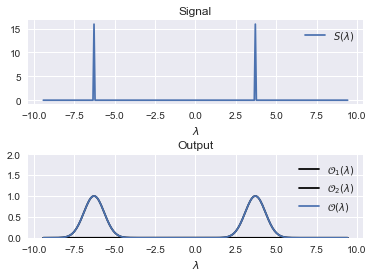

In [74]:
offset = int(10/dx)
plotso2(signal=Shapes['delta'], output=Shapes['gaussian'],offset=offset)

That still looks like all we care about is what the input signal looks like. But what happens if we move them closer together?

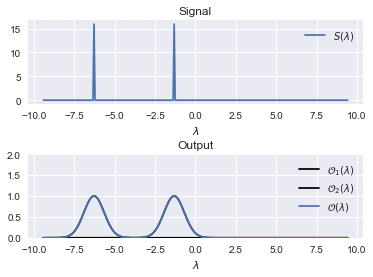

In [80]:
offset = int(5/dx)
plotso2(signal=Shapes['delta'], output=Shapes['gaussian'],offset=offset)

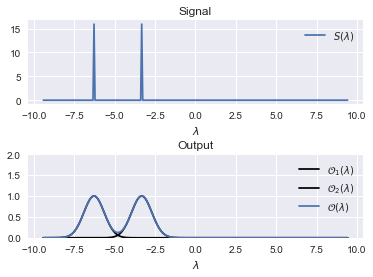

In [81]:
offset = int(3/dx)
plotso2(signal=Shapes['delta'], output=Shapes['gaussian'],offset=offset)

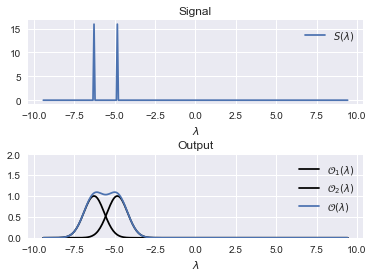

In [83]:
offset = int(1.5/dx)
plotso2(signal=Shapes['delta'], output=Shapes['gaussian'],offset=offset)

So, we get the idea that our output is, in some essential way, "our input times our instrument function." Incidentaly, this might remind you a bit about kernel density estimation, in which case, you can just think of KDE as an input signal convolved with a kernel, and you're done.

Our goal for right now is to say "ok, given a signal, and an instrument function, what output would you get?" The goal in most applications is "given this output, and this instrument function, what was the input?" The first is a _convolution_ while the second is a _deconvolution_.

Let's narrow down our question a bit: **given a signal, and an instrument function, what output would you get at a specific frequency, $\lambda$?**

With an ideal spectrometer, you'd just need to know what the input signal was at that particular $\lambda$. However, as is clear from the above graphs, that's not enough. Looking directly above, if we wanted to know the output at $2\pi$ (the center of the first delta function), we also needed to know the input from the second delta function, which was centered at $2\pi + 1$.

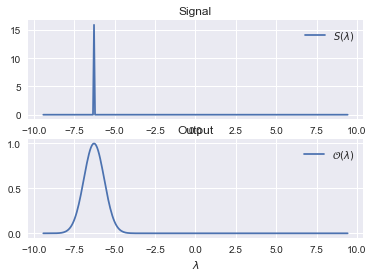

In [39]:
plotso(signal=Shapes['delta'], output=Shapes['gaussian'])

We have a delta function centered on $\lambda_1$, i.e. $\delta(\lambda - \lambda_1)$. (In the above plot, it's centered at $2\pi$). The output at $\lambda_1$ is clearly just the center of our instrument function, $I(\lambda - \lambda_1)$. It's tempting to say that the output is just $$\mathcal{O}(\lambda) = \delta(\lambda - \lambda_1)I(\lambda - \lambda_1)$$ but that's not good enough: if you look closely, you see that $\mathcal{O}(\textrm{anything other than } \lambda) = 0$, which doesn't look like our gaussian at all.

If we fancy up our language a bit, what we come up with is that a little infinitesimal chunk of output, $d\mathcal{O}(\lambda)$, should look like $$d\mathcal{O}(\lambda) = S(\lambda_1)d\lambda_1I(\lambda_1-\lambda)$$

So, if our input is one $\delta$ centered at $\lambda_1$ and another centered at $\lambda_2$, we could write that as $\delta(\lambda - \lambda_1) + \delta(\lambda - \lambda_2)$ (we had a bit of a review over that notation, but remember that the $\delta$ function is only non-zero when its argument is zero, so to make it "centered" at $\lambda_1$, you use $\delta(\lambda - \lambda_1)$, etc.

Then, to get our output for this input signal, we say a bit more formally

$$\mathcal{O}(\lambda) = \delta(\lambda - \lambda_1)I(\lambda - \lambda_1) + \delta(\lambda - \lambda_2)I(\lambda - \lambda_2) $$

And, if we had a bunch of point sources for out input function, we would add all of those things together:

$$\mathcal{O}(\lambda) = \delta(\lambda - \lambda_1)I(\lambda - \lambda_1) + \delta(\lambda - \lambda_2)I(\lambda - \lambda_2) + \ldots \delta(\lambda - \lambda_N)I(\lambda - \lambda_N)$$



Thoughts: walk instrument function over

# Code

To make the above a little clearer, I've moved a lot of the code to the bottom. Run this stuff first if you're doing this interactively.

In [3]:
from matplotlib import pyplot as plt
import numpy as np, seaborn as sns
from numpy import pi, linspace, ones_like, arange, zeros_like
from ipywidgets import fixed, interact, IntSlider
from scipy import signal


%matplotlib inline

In [71]:
nx = 100 # number of points for our input signal/instrument function
fullx = linspace(-3*pi,3*pi,3*nx+1)
subx = linspace(-pi,pi,nx+1)
dx = subx[1] - subx[0]

Shapes = {}
Shapes['delta'] = zeros_like(subx) # Like a delta function, area 1
Shapes['delta'][int(subx.shape[0]/2)] = 1/dx
Shapes['gaussian'] = signal.gaussian(subx.shape[0],std=int(subx.shape[0]/10))

def plotso(signal,output):
    fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)
    y1, y2 = zeros_like(fullx), zeros_like(fullx)
    y1[:subx.shape[0]] = signal
    y2[:subx.shape[0]] = output

    ax1.plot(fullx,y1,label='$S(\lambda)$')
    ax1.set_xlabel("$\lambda$")
    ax1.set_title("Signal")
    ax1.legend()

    ax2.plot(fullx,y2,label='$\mathcal{O}(\lambda)$')
    ax2.set_xlabel("$\lambda$")
    ax2.set_title("Output")
    ax2.legend()
    fig.subplots_adjust(hspace=0.6)

In [70]:
def plotso2(signal,output,offset):
    fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)
    signal_1, signal_2 = zeros_like(fullx), zeros_like(fullx)
    output_1, output_2 = zeros_like(fullx), zeros_like(fullx)
    y1, y2 = zeros_like(fullx), zeros_like(fullx)

    signal_1[:subx.shape[0]] = signal
    signal_2[offset:subx.shape[0] + offset] = signal
    y1 = signal_1 + signal_2
    
    output_1[:subx.shape[0]] = output
    output_2[offset:subx.shape[0] + offset] = output
    y2 = output_1 + output_2

    ax1.plot(fullx,y1,label='$S(\lambda)$')
    ax1.set_xlabel("$\lambda$")
    ax1.set_title("Signal")
    ax1.legend()

    ax2.plot(fullx,output_1,'k-',label='$\mathcal{O}_1(\lambda)$')
    ax2.plot(fullx,output_2,'k-',label='$\mathcal{O}_2(\lambda)$')

    ax2.plot(fullx,y2,label='$\mathcal{O}(\lambda)$')
    ax2.set_xlabel("$\lambda$")
    ax2.set_title("Output")
    ax2.set_ylim(0,2)
    ax2.legend()
    fig.subplots_adjust(hspace=0.6)